In [1]:
#Read in file names and paths from the input directory
from os import walk
import os

filePath = 'input'
f = {}
for (dirpath, dirnames, filenames) in walk(filePath):
    if filenames:
        f[dirpath.rsplit('/', 1)[-1]] = list(os.path.join(dirpath, x) for x in filenames)
    
f

{'dry': ['input/dry/1128491081.CSV',
  'input/dry/1993312851.CSV',
  'input/dry/1851359291.CSV',
  'input/dry/2015029203.CSV',
  'input/dry/673798596.CSV',
  'input/dry/1387191509.CSV',
  'input/dry/157118630.CSV',
  'input/dry/1367731996.CSV',
  'input/dry/1088131773.CSV',
  'input/dry/526590785.CSV',
  'input/dry/1240596962.CSV',
  'input/dry/1948652171.CSV',
  'input/dry/891085006.CSV',
  'input/dry/957252430.CSV',
  'input/dry/323836156.CSV',
  'input/dry/1135972257.CSV',
  'input/dry/870156681.CSV',
  'input/dry/459361833.CSV',
  'input/dry/2054490787.CSV',
  'input/dry/532873244.CSV',
  'input/dry/352572264.CSV',
  'input/dry/1910189788.CSV',
  'input/dry/2059645055.CSV',
  'input/dry/419776737.CSV',
  'input/dry/875121173.CSV',
  'input/dry/530759577.CSV',
  'input/dry/438882418.CSV',
  'input/dry/1344943899.CSV',
  'input/dry/529404666.CSV',
  'input/dry/511827363.CSV',
  'input/dry/1465550401.CSV',
  'input/dry/1388703417.CSV',
  'input/dry/679156288.CSV',
  'input/dry/1781638

In [2]:
#Read in CSV files
import pandas as pd
import numpy as np

data = []
labels = []
label_names = []
file_path = []

index = 0
for key in f:
    for fileName in f[key]:
        #read csv
        df = pd.read_csv(fileName, header=None, usecols=lambda x: x < 64)
        #add to data
        data.append(df.values[0])
        #add labels
        labels.append(index)
        #save dile path
        file_path.append(fileName)
    #add label name    
    label_names.append(key)
    #count numver of classes
    index += 1


In [3]:
len(data)

902

In [4]:
from sklearn.externals import joblib
from tensorflow.python.keras.models import load_model

scaler_filename = "scaler.save"
scaler_model = joblib.load(scaler_filename) 
model = load_model('test_model.h5')

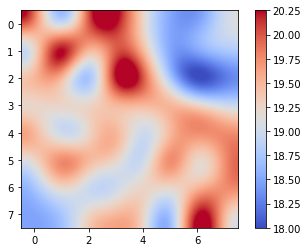

432
PREDICTION
dry
0.9388363
LABEL
pee
input/pee/1622018183.CSV


In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0,len(data)):
    #Test the data
    scaled_data = scaler_model.transform(np.array([data[i]]))
    pred = model.predict(scaled_data)

    #Check if prediction is wrong
    if np.argmax(pred) != labels[i]:
        
        #Show the image
        plt.imshow(data[i].reshape((8,8)), cmap='coolwarm', interpolation='lanczos')
        plt.colorbar()
        plt.show()
        #Show prediction
        print(i)
        print("PREDICTION")
        print(label_names[np.argmax(pred)])
        print(pred[0][np.argmax(pred)])
        #Show label
        print("LABEL")
        print(label_names[labels[i]])
        print(file_path[i])
        a = raw_input('Correct y/n?')
        clear_output()
        if a == 'n':
            #Move file
            src = filePath + '/' + label_names[labels[i]] + '/' + file_path[i].split('/')[2]
            dst = filePath + '/' + label_names[1 - labels[i]] + '/' + file_path[i].split('/')[2]
            print(src)
            print(dst)
            #os.rename("path/to/current/file.foo", "path/to/new/destination/for/file.foo")